## Simulation Data Visualization

In this notebook, we format and visualize one of the data visualization sets

### Imports

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go

### Load in data and format

In [26]:
def correct_motors(file_path_list, corrected_dir):
    for file in file_path_list:
        temp_df = pd.read_csv(file)
        temp_df = temp_df.rename(columns={'motor_1_position': 'motor_1_temp'})
        temp_df = temp_df.rename(columns={'motor_2_position': 'motor_1_position'})
        temp_df = temp_df.rename(columns={'motor_1_temp': 'motor_2_position'})
        file_name = file.split('/')[-1]
        temp_df.to_csv(corrected_dir + '/' + file_name, index=False)

In [2]:
data_path_1 = '../data/corrected_motors/run_1_desk_lamp.csv'
data_path_2 = '../data/corrected_motors/run_2_living_room.csv'
data_path_3 = '../data/corrected_motors/run_3_living_room_lamp.csv'
data_path_4 = '../data/corrected_motors/run_4_living_room_no_lamp.csv'
data_path_5 = '../data/corrected_motors/run_5_kitchen_no_lights.csv'
data_path_6 = '../data/initial_environments/my_test_run.csv'
# raw_df = pd.read_csv(data_path)

In [5]:
def transform_coordinates(x):
    motor_1 = x['motor_1_position']
    motor_2 = x['motor_2_position']
    adjusted_motor_1 = motor_1
    adjusted_motor_2 = motor_2
    if motor_2 > 90:
        adjusted_motor_1 += 180
        adjusted_motor_2 = 180 - motor_2
    x['xy_angle'] = adjusted_motor_1
    x['yz_angle'] = adjusted_motor_2
    return x

In [6]:
test_df = pd.read_csv(data_path_6)

In [7]:
test_df = test_df.apply(transform_coordinates, axis=1)

In [9]:
def load_and_visualize_data_adjusted(data_path):
    raw_df = pd.read_csv(data_path)
    data_df = raw_df.copy()
    # Make current positive
    data_df['I_ivp_1'] = data_df['I_ivp_1'].abs()
    data_df['power'] = data_df['I_ivp_1'] * data_df['V_ivp_1']
    # Generate data for visualization
    viz_df = data_df[['power', 'motor_1_position', 'motor_2_position']]
    viz_df = viz_df.apply(transform_coordinates, axis=1)
    viz_df = viz_df.drop_duplicates(subset=['xy_angle', 'yz_angle'])
    viz_df = viz_df.sort_values(by=['xy_angle','yz_angle'])
    fig = px.scatter_3d(viz_df, x='xy_angle', y='yz_angle', z='power',
                      color='power', opacity=1, width=600, height=600, #size_max=10, # size='power',
                   range_z=[0,0.015], range_color=[0,0.015])
    fig.update_traces(marker={'size': 5})
    fig.show()

In [10]:
## Need to address motor 1 / motor 2 swapping
fasdgdsaf

NameError: name 'fasdgdsaf' is not defined

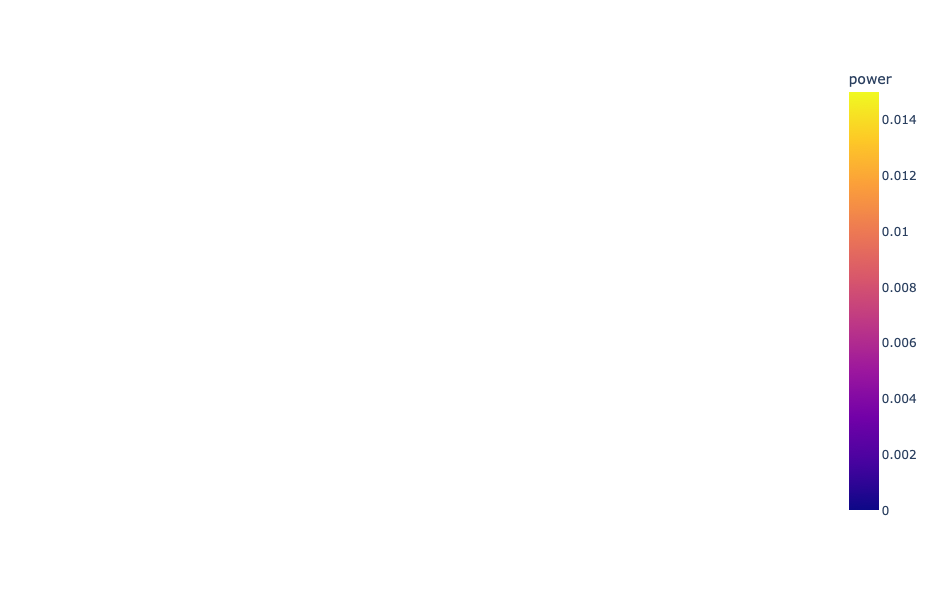

In [29]:
load_and_visualize_data_adjusted(data_path_6)

In [32]:
def load_and_visualize_data(data_path):
    raw_df = pd.read_csv(data_path)
    data_df = raw_df.copy()
    # Make current positive
    data_df['I_ivp_1'] = data_df['I_ivp_1'].abs()
    data_df['power'] = data_df['I_ivp_1'] * data_df['V_ivp_1']
    # Generate data for visualization
    viz_df = data_df[['power', 'motor_1_position', 'motor_2_position']]
    viz_df = viz_df.drop_duplicates(subset=['motor_1_position', 'motor_2_position'])
    viz_df = viz_df.sort_values(by=['motor_1_position','motor_2_position'])
    fig = px.scatter_3d(viz_df, x='motor_1_position', y='motor_2_position', z='power',
                      color='power', opacity=1, width=600, height=600, #size_max=10, # size='power',
                   range_z=[0,0.015], range_color=[0,0.015])
    fig.update_traces(marker={'size': 5})
    fig.show()

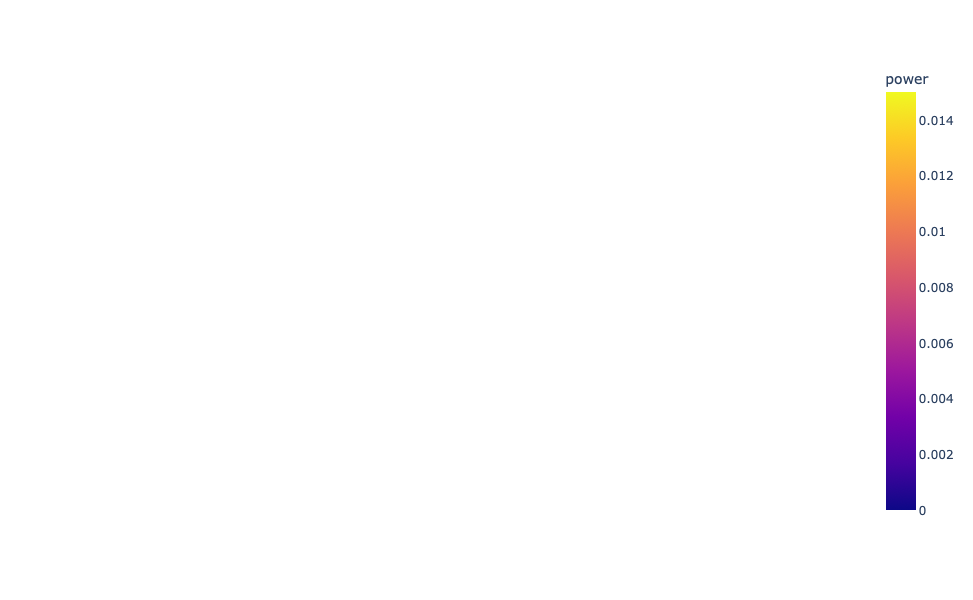

In [33]:
load_and_visualize_data(data_path_5)

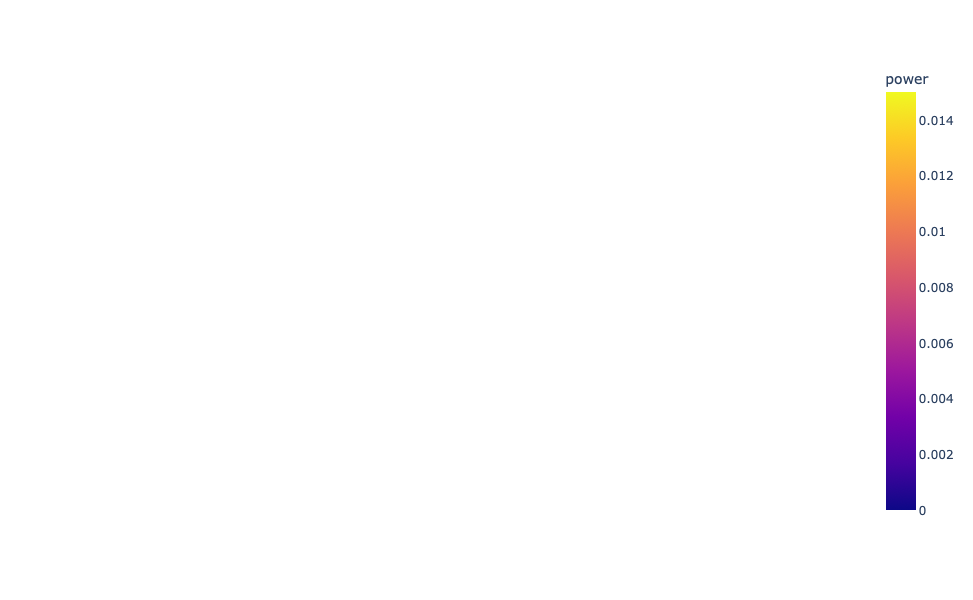

In [96]:
load_and_visualize_data(data_path_4)

In [31]:
# Copy df for editing
data_df = raw_df.copy()
# Make current positive
data_df['I_ivp_1'] = data_df['I_ivp_1'].abs()
data_df['power'] = data_df['I_ivp_1'] * data_df['V_ivp_1']

In [32]:
# Generate data for visualization
viz_df = data_df[['power', 'motor_1_position', 'motor_2_position']]
viz_df = viz_df.drop_duplicates(subset=['motor_1_position', 'motor_2_position'])

In [34]:
viz_df = viz_df.sort_values(by=['motor_1_position','motor_2_position'])

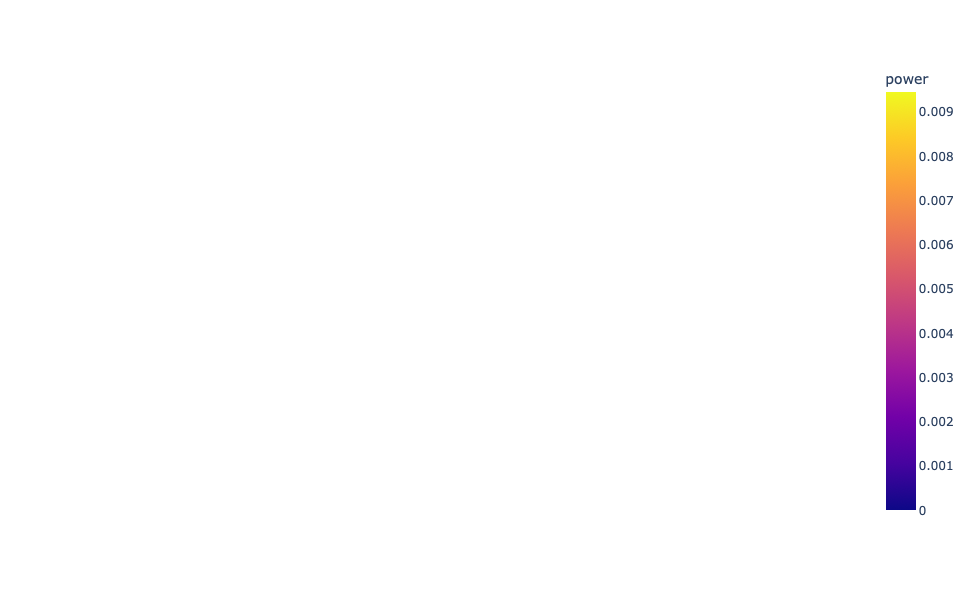

In [37]:
fig = px.scatter_3d(viz_df, x='motor_1_position', y='motor_2_position', z='power',
                      color='power', size='power', size_max=18, opacity=1, width=600, height=600,
                   range_z=[0,0.02])
fig.show()